In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# Загрузка данных

In [2]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [2]:
data = pd.read_excel('data/data_ford_price.xlsx') 

# Трансформация признаков

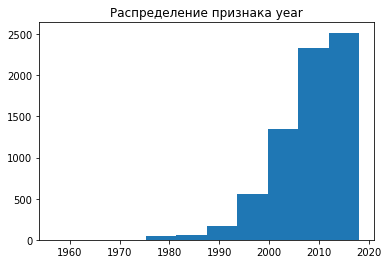

In [3]:
plt.hist(data.year)
plt.title('Распределение признака year');

## Квантильное преобразование

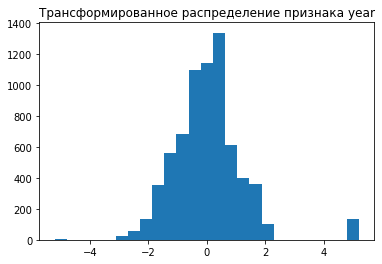

In [16]:
data_for_transform = data['year'].values.reshape((len(data),1))
 
quantile = QuantileTransformer(output_distribution='normal')
quant =  QuantileTransformer()
data_transformed = quantile.fit_transform(data_for_transform)
 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

## Задание 6.1

<AxesSubplot:>

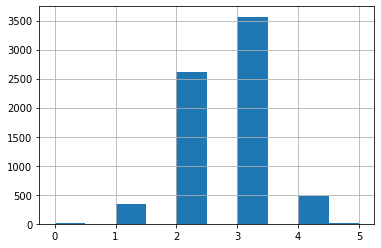

In [6]:
data['condition'].hist()

<AxesSubplot:>

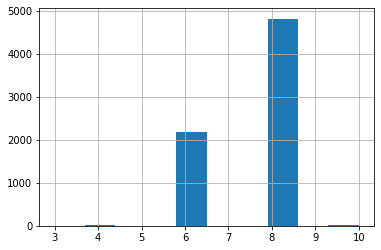

In [7]:
data['cylinders'].hist()

In [17]:
condition_transform = data['condition'].values.reshape((len(data),1))
cylinders_transform = data['cylinders'].values.reshape((len(data),1))

In [18]:
condition_transformed = quant.fit_transform(condition_transform)
cylinders_transformed = quant.fit_transform(cylinders_transform)

(array([ 349.,    0., 2613.,    0.,    0.,    0., 3566.,    0.,    0.,
         489.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

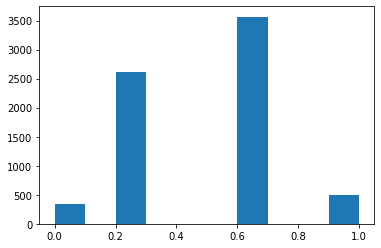

In [19]:
plt.hist(condition_transformed)

(array([  17., 2173.,    0.,    0.,    0.,    0., 4816.,    0.,    0.,
          11.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

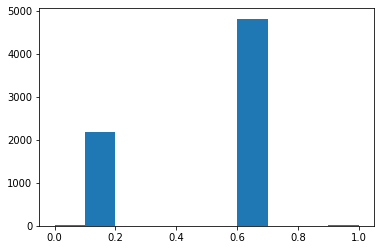

In [20]:
plt.hist(cylinders_transformed)

In [21]:
data['condition_transformed'] = condition_transformed

In [23]:
data['condition_transformed'][0]

0.9639639639639639

## Логарифмическое преобразование

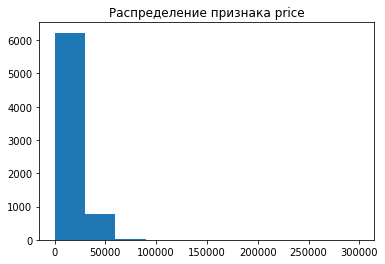

In [24]:
plt.hist(data.price)
plt.title('Распределение признака price');

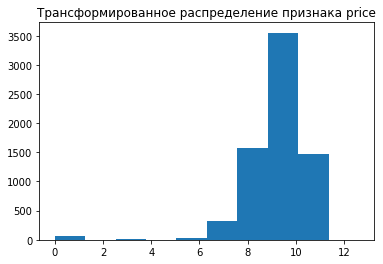

In [25]:
log_price = np.log(data['price'])
 
plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()

In [26]:
price_data = pd.concat([data['price'], log_price.rename('transformed_price')], axis = 1)
 
price_data.describe()

,price,transformed_price
count,7017.000000,7017.000000
mean,15121.549523,9.204510
std,11765.423119,1.275868
min,1.000000,0.000000
25%,5995.000000,8.698681
50%,12750.000000,9.453287
75%,21995.000000,9.998570
max,299500.000000,12.609870


2.0

## Задание 6.2

In [36]:
round(np.log10(10))
# reverse 
#np.exp(np.log(10))

1

In [37]:
round(np.log10(100))

2

In [38]:
round(np.log10(100000))

5

## Задание 6.3

In [28]:
price_data['transformed_price'].tail(1)

7016    9.798127
Name: transformed_price, dtype: float64

## Преобразование Бокса-Кокса

In [39]:
box_cox = PowerTransformer(method = 'box-cox')
 
data_box_cox = box_cox.fit_transform(data[['price', 'year']].values)
data_box_cox = pd.DataFrame(data_box_cox, columns = ['transformed_price', 'transformed_year'])

/home/russ174/.local/lib/python3.9/site-packages/numpy/core/_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/russ174/.local/lib/python3.9/site-packages/numpy/core/_methods.py:246: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


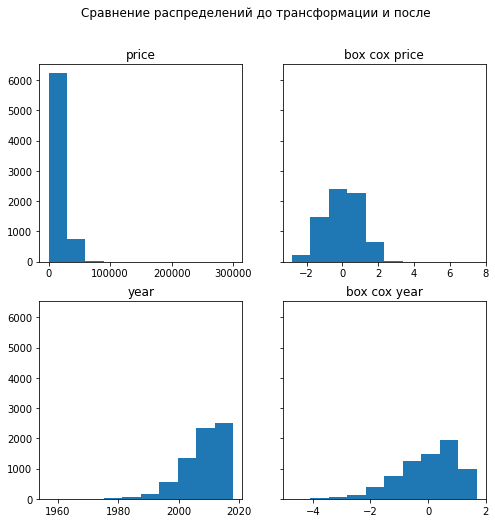

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharey=True)
axs[0][0].hist(data['price'])
axs[1][0].hist(data['year'])
axs[0][1].hist(data_box_cox['transformed_price'])
axs[1][1].hist(data_box_cox['transformed_year'])

axs[0][0].set(title='price')
axs[0][1].set(title='box cox price')

axs[1][0].set(title='year')
axs[1][1].set(title='box cox year')

fig.suptitle('Сравнение распределений до трансформации и после')

plt.show()